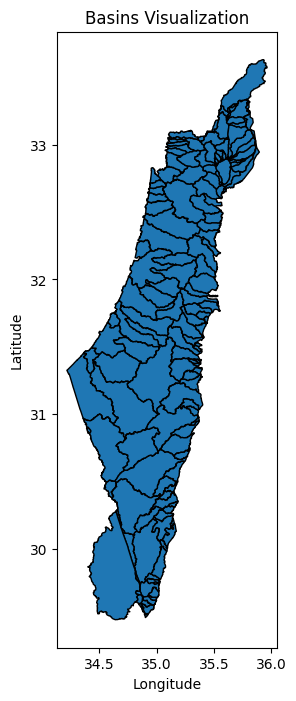

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to your shapefile
shapefile_path = "/media/data-ssd/PINN/DATA/basins layer/Basins_Web_V13.shp"

# 1. Read the shapefile with GeoPandas
basins_gdf = gpd.read_file(shapefile_path)

# 2. Inspect the first few rows (optional)
basins_gdf.head()

# 3. Plot the basins
basins_gdf.plot(figsize=(10, 8), edgecolor='black')

# 4. Display the plot
plt.title("Basins Visualization")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [2]:
import geopandas as gpd

# Path to your shapefile
shapefile_path = "/media/data-ssd/PINN/DATA/basins layer/Basins_Web_V13.shp"

# Read the shapefile
basins_gdf = gpd.read_file(shapefile_path)

# 1. Check what columns are in the shapefile
print("Columns in the shapefile:")
print(basins_gdf.columns)

# 2. Inspect the first few rows
print("\nFirst few rows of the attribute table:")
print(basins_gdf.head())

# 3. If 'NAME_EN' is indeed the column with the basin names, list them:
# (You may replace 'NAME_EN' with whichever column contains the names.)
if 'NAME_EN' in basins_gdf.columns:
    unique_names = basins_gdf['NAME_EN'].unique()
    print("\nBasin Names (unique):")
    for name in unique_names:
        print(name)
else:
    print("\n'NAME_EN' column not found. Check the columns list above to see the actual column name.")


Columns in the shapefile:
Index(['basin_c', 'NAME_EN', 'area_n_en', 'IMS_Alert', 'area_n_heb',
       'geometry'],
      dtype='object')

First few rows of the attribute table:
   basin_c        NAME_EN        area_n_en  IMS_Alert  area_n_heb  \
0    204.0  Kinneret_Lake             None        0.0        None   
1     17.0    Beit_HaEmek  Western Galilee        1.0  ???? ?????   
2     19.0         Betzet  Western Galilee        1.0  ???? ?????   
3     22.0         Gaaton  Western Galilee        1.0  ???? ?????   
4     52.0           Kziv  Western Galilee        1.0  ???? ?????   

                                            geometry  
0  POLYGON ((35.52467 32.84641, 35.52967 32.85169...  
1  POLYGON ((35.27829 32.99644, 35.27901 32.99592...  
2  POLYGON ((35.3574 33.05544, 35.35757 33.05543,...  
3  POLYGON ((35.27829 32.99644, 35.27429 32.99894...  
4  POLYGON ((35.35969 33.041, 35.35889 33.03906, ...  

Basin Names (unique):
Kinneret_Lake
Beit_HaEmek
Betzet
Gaaton
Kziv
Lebanon_st

In [3]:
import geopandas as gpd

# 1. Read the original shapefile
shapefile_path = "/media/data-ssd/PINN/DATA/basins layer/Basins_Web_V13.shp"
basins_gdf = gpd.read_file(shapefile_path)

# 2. Filter for the specific basins
target_names = ["Arugot", "Darga", "Khatsatson"]
filtered_gdf = basins_gdf[basins_gdf["NAME_EN"].isin(target_names)]

# 3. Display the filtered GeoDataFrame in the notebook
filtered_gdf

# 4. (Optional) Export these polygons to a new Shapefile
out_shapefile = "Arugot_Darga_Khatsatson.shp"
filtered_gdf.to_file(out_shapefile)
print(f"Exported to {out_shapefile}")

Exported to Arugot_Darga_Khatsatson.shp


,basin_c,NAME_EN,area_n_en,IMS_Alert,area_n_heb,geometry
75,156.0,Arugot,Northern Dead Sea,12.0,???? ?? ????,"POLYGON ((35.13125 31.64565, 35.13406 31.64265..."
76,28.0,Darga,Northern Dead Sea,12.0,???? ?? ????,"POLYGON ((35.33467 31.65367, 35.33561 31.65012..."
79,35.0,Khatsatson,Northern Dead Sea,12.0,???? ?? ????,"POLYGON ((35.41237 31.56814, 35.41213 31.56726..."


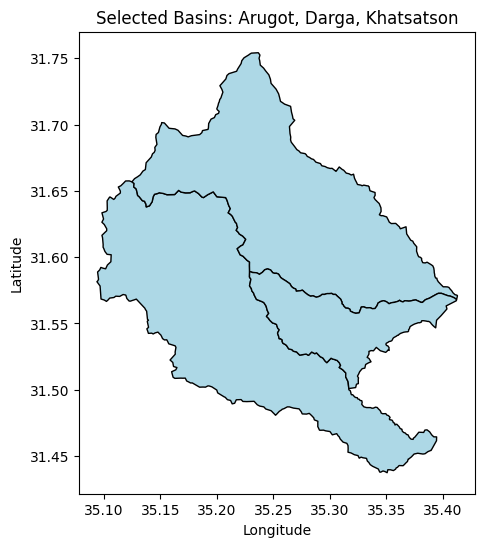

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Read the original shapefile
shapefile_path = "/media/data-ssd/PINN/DATA/basins layer/Basins_Web_V13.shp"
basins_gdf = gpd.read_file(shapefile_path)

# 2. Filter for the specific basins
target_names = ["Arugot", "Darga", "Khatsatson"]
filtered_gdf = basins_gdf[basins_gdf["NAME_EN"].isin(target_names)]

# 3. Display the filtered attribute table
display(filtered_gdf)

# 4. Plot the filtered polygons
filtered_gdf.plot(
    figsize=(8, 6), 
    edgecolor='black', 
    facecolor='lightblue'
)
plt.title("Selected Basins: Arugot, Darga, Khatsatson")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Bounding Box:
  minx=35.09384183303422, miny=31.43744033740171, maxx=35.41310770285827, maxy=31.754231866507496


/tmp/ipykernel_132087/2875380068.py:63: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


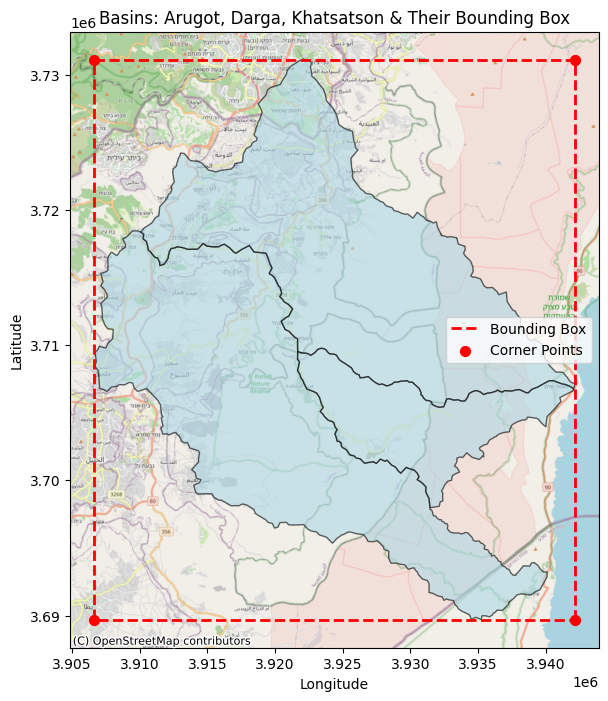

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import box, Point

# -------------------------
# 1) Read the original shapefile
# -------------------------
shapefile_path = "/media/data-ssd/PINN/DATA/basins layer/Basins_Web_V13.shp"
basins_gdf = gpd.read_file(shapefile_path)

# -------------------------
# 2) Filter for the specific basins
# -------------------------
target_names = ["Arugot", "Darga", "Khatsatson"]
filtered_gdf = basins_gdf[basins_gdf["NAME_EN"].isin(target_names)]

# -------------------------
# 3) Get Bounding Box (Total Extent)
# -------------------------
minx, miny, maxx, maxy = filtered_gdf.total_bounds
print("Bounding Box:")
print(f"  minx={minx}, miny={miny}, maxx={maxx}, maxy={maxy}")

# Define the bounding box as a polygon
bbox_poly = box(minx, miny, maxx, maxy)

# Create corner points
corner_points = [Point(minx, miny), Point(maxx, miny), Point(maxx, maxy), Point(minx, maxy)]

# Convert bounding box & corner points into GeoDataFrames
bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_poly], crs=filtered_gdf.crs)
corners_gdf = gpd.GeoDataFrame(geometry=corner_points, crs=filtered_gdf.crs)

# -------------------------
# 4) Convert Everything to EPSG:3857 for Basemap
# -------------------------
filtered_gdf = filtered_gdf.to_crs(epsg=3857)
bbox_gdf = bbox_gdf.to_crs(epsg=3857)
corners_gdf = corners_gdf.to_crs(epsg=3857)

# -------------------------
# 5) Plot Everything
# -------------------------
fig, ax = plt.subplots(figsize=(10, 8))

# Plot basins in light blue
filtered_gdf.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.6, label="Basins")

# Plot bounding box in red
bbox_gdf.boundary.plot(ax=ax, color="red", linewidth=2, linestyle="--", label="Bounding Box")

# Plot corner points as red dots
corners_gdf.plot(ax=ax, marker="o", color="red", markersize=50, label="Corner Points")

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Final Adjustments
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Basins: Arugot, Darga, Khatsatson & Their Bounding Box")
plt.legend()
plt.show()


Bounding Box:
  minx=35.09384183303422, miny=31.43744033740171, maxx=35.41310770285827, maxy=31.754231866507496


/home/amit/anaconda3/envs/gpu/lib/python3.11/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)
/tmp/ipykernel_132087/1426783327.py:63: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


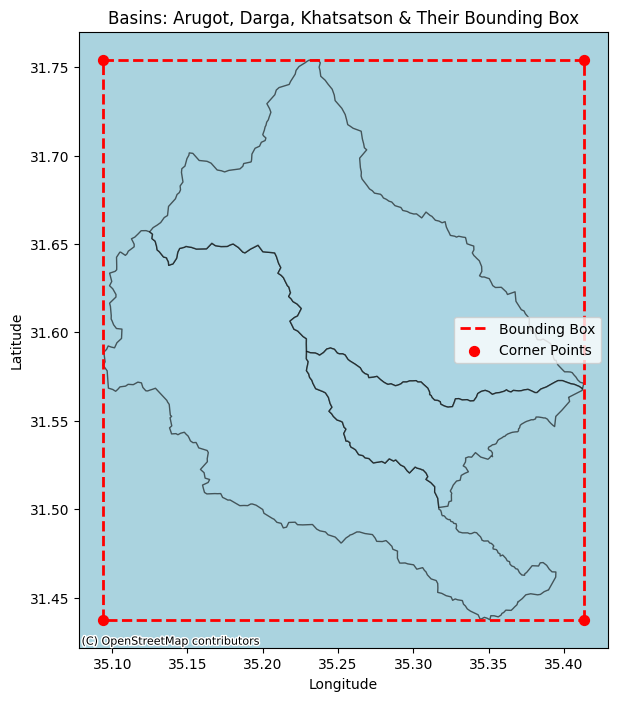

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import box, Point

# -------------------------
# 1) Read the original shapefile
# -------------------------
shapefile_path = "/media/data-ssd/PINN/DATA/basins layer/Basins_Web_V13.shp"
basins_gdf = gpd.read_file(shapefile_path)

# -------------------------
# 2) Filter for the specific basins
# -------------------------
target_names = ["Arugot", "Darga", "Khatsatson"]
filtered_gdf = basins_gdf[basins_gdf["NAME_EN"].isin(target_names)]

# -------------------------
# 3) Get Bounding Box (Total Extent)
# -------------------------
minx, miny, maxx, maxy = filtered_gdf.total_bounds
print("Bounding Box:")
print(f"  minx={minx}, miny={miny}, maxx={maxx}, maxy={maxy}")

# Define the bounding box as a polygon
bbox_poly = box(minx, miny, maxx, maxy)

# Create corner points
corner_points = [Point(minx, miny), Point(maxx, miny), Point(maxx, maxy), Point(minx, maxy)]

# Convert bounding box & corner points into GeoDataFrames
bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_poly], crs=filtered_gdf.crs)
corners_gdf = gpd.GeoDataFrame(geometry=corner_points, crs=filtered_gdf.crs)

# -------------------------
# 4) Convert Everything to EPSG:3857 for Basemap
# -------------------------
filtered_gdf = filtered_gdf.to_crs(epsg=4326)
bbox_gdf = bbox_gdf.to_crs(epsg=4326)
corners_gdf = corners_gdf.to_crs(epsg=4326)

# -------------------------
# 5) Plot Everything
# -------------------------
fig, ax = plt.subplots(figsize=(10, 8))

# Plot basins in light blue
filtered_gdf.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.6, label="Basins")

# Plot bounding box in red
bbox_gdf.boundary.plot(ax=ax, color="red", linewidth=2, linestyle="--", label="Bounding Box")

# Plot corner points as red dots
corners_gdf.plot(ax=ax, marker="o", color="red", markersize=50, label="Corner Points")

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Final Adjustments
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Basins: Arugot, Darga, Khatsatson & Their Bounding Box")
plt.legend()
plt.show()


In [11]:
import geopandas as gpd

def extract_polygons(input_shapefile, names, attribute_field="NAME_EN", output_shapefile=None):
    """
    Extract polygons from a shapefile whose specified attribute field matches one of the given names.
    
    Parameters:
        input_shapefile (str): Path to the input shapefile.
        names (list of str): List of names (e.g., ["Arugot", "Darga"]) to filter by.
        attribute_field (str): The attribute field name to filter on (default is "NAME_EN").
        output_shapefile (str, optional): Path to write the filtered features as a new shapefile.
        
    Returns:
        geopandas.GeoDataFrame: The filtered GeoDataFrame.
    """
    # Read the shapefile into a GeoDataFrame
    gdf = gpd.read_file(input_shapefile)
    
    # Filter the GeoDataFrame using the specified attribute field
    filtered_gdf = gdf[gdf[attribute_field].isin(names)]
    
    # Optionally, write the filtered GeoDataFrame to a new shapefile
    if output_shapefile:
        filtered_gdf.to_file(output_shapefile)
        print(f"Filtered shapefile saved to: {output_shapefile}")
    
    return filtered_gdf

if __name__ == '__main__':
    # Path to the original shapefile
    input_shapefile = "/media/data-ssd/PINN/DATA/basins layer/Basins_Web_V13.shp"
    
    # List of basin names to extract
    names_to_extract = ["Arugot", "Darga"]
    
    # The attribute field containing the basin names is "NAME_EN"
    attribute_field = "NAME_EN"
    
    # (Optional) Output shapefile path for the extracted basins
    output_shapefile = "/media/data-ssd/PINN/DATA/basins layer/Arugot_Darga.shp"
    
    # Extract the desired polygons
    extracted_polygons = extract_polygons(
        input_shapefile,
        names_to_extract,
        attribute_field=attribute_field,
        output_shapefile=output_shapefile
    )
    
    # Print summary information
    print(f"Extracted {len(extracted_polygons)} feature(s):")
    print(extracted_polygons.head())


Filtered shapefile saved to: /media/data-ssd/PINN/DATA/basins layer/Arugot_Darga.shp
Extracted 2 feature(s):
    basin_c NAME_EN          area_n_en  IMS_Alert    area_n_heb  \
75    156.0  Arugot  Northern Dead Sea       12.0  ???? ?? ????   
76     28.0   Darga  Northern Dead Sea       12.0  ???? ?? ????   

                                             geometry  
75  POLYGON ((35.13125 31.64565, 35.13406 31.64265...  
76  POLYGON ((35.33467 31.65367, 35.33561 31.65012...  


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to your shapefile
shapefile_path = "/media/data-ssd/PINN/DATA/streams layer 4m/strem_elevation_V1.shp"

# 1. Read the shapefile with GeoPandas
basins_gdf = gpd.read_file(shapefile_path)

# 2. Inspect the first few rows (optional)
basins_gdf.head()

# 3. Plot the basins
basins_gdf.plot(figsize=(10, 8), edgecolor='black')

# 4. Display the plot
plt.title("Basins Visualization")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

CRSError: CPLReadLineBuffer(): Trying to allocate more than 2 GB.

Attempting to read Shapefile: /media/data-ssd/PINN/DATA/streams layer 4m/strem_elevation_V1.shp
Error reading Shapefile: CPLReadLineBuffer(): Trying to allocate more than 2 GB.
Attempting to convert Shapefile to GeoPackage using ogr2ogr...


ERROR 2: CPLReadLineBuffer(): Trying to allocate more than 2 GB.


Conversion successful! GeoPackage created at: /media/data-ssd/PINN/DATA/streams layer 4m/strem_elevation_V1.gpkg
Successfully read the GeoPackage!


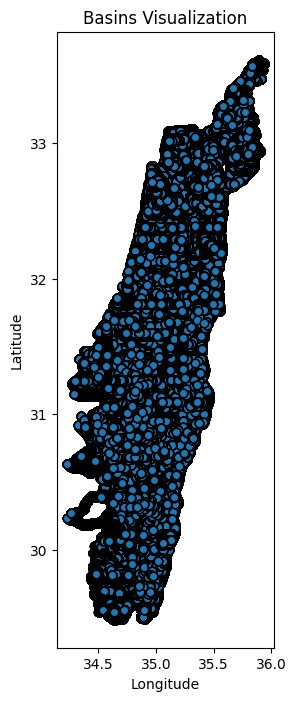

In [2]:
#!/usr/bin/env python3

import subprocess
import sys
import geopandas as gpd
import matplotlib.pyplot as plt
import os

def main():
    # 1. Specify your Shapefile path
    shapefile_path = "/media/data-ssd/PINN/DATA/streams layer 4m/strem_elevation_V1.shp"

    # 2. Prepare a corresponding GeoPackage path
    #    e.g., "/media/data-ssd/PINN/DATA/streams layer 4m/strem_elevation_V1.gpkg"
    gpkg_path = os.path.splitext(shapefile_path)[0] + ".gpkg"

    # 3. Try reading the Shapefile directly
    try:
        print(f"Attempting to read Shapefile: {shapefile_path}")
        basins_gdf = gpd.read_file(shapefile_path)
        print("Successfully read the Shapefile!")
    except Exception as e:
        print(f"Error reading Shapefile: {e}")
        print("Attempting to convert Shapefile to GeoPackage using ogr2ogr...")

        # 3a. Convert the Shapefile -> GeoPackage
        try:
            # Example ogr2ogr command:
            # ogr2ogr -f GPKG /path/to/output.gpkg /path/to/input.shp
            subprocess.run(
                ["ogr2ogr", "-f", "GPKG", gpkg_path, shapefile_path],
                check=True
            )
            print(f"Conversion successful! GeoPackage created at: {gpkg_path}")

            # 3b. Read the GeoPackage with GeoPandas
            basins_gdf = gpd.read_file(gpkg_path)
            print("Successfully read the GeoPackage!")
        except Exception as ex:
            print(f"Failed to convert/read GeoPackage: {ex}")
            sys.exit(1)  # Stop the script if conversion also fails

    # 4. Plot the resulting GeoDataFrame
    basins_gdf.plot(figsize=(10, 8), edgecolor='black')
    plt.title("Basins Visualization")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

if __name__ == "__main__":
    main()


In [3]:
#!/usr/bin/env python3

import pandas as pd

def main():
    csv_path = "/media/data-ssd/PINN/DATA/streams layer 4m/strem_elevation_V1.csv"
    
    # Read the CSV
    df = pd.read_csv(csv_path)
    
    # Print the first 5 rows
    print(df.head())

if __name__ == "__main__":
    main()


   STRM_ORDER   UNIQ_ID    SAMPLE_1          x          y
0           3  59305739  892.654724  34.591159  30.421250
1           3  59305739  892.407532  34.591201  30.421253
2           3  59305739  892.234558  34.591242  30.421257
3           3  59305739  892.349976  34.591284  30.421260
4           3  59305739  892.124634  34.591325  30.421264


In [1]:
import pandas as pd
import folium
import branca.colormap as cm

# 1. Read the CSV into a DataFrame
df = pd.read_csv("/media/data-ssd/PINN/DATA/streams layer 4m/strem_elevation_V1.csv")

# 2. Calculate a center (mean lat/lon)
center_lat = df["y"].mean()
center_lon = df["x"].mean()

# 3. Create the base Folium map
m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# 4. Create a colormap based on min and max elevation
min_elev = df["SAMPLE_1"].min()
max_elev = df["SAMPLE_1"].max()
colormap = cm.linear.YlOrRd_09.scale(min_elev, max_elev)
colormap.caption = "Elevation (SAMPLE_1)"
colormap.add_to(m)  # This adds a legend-like color scale on your map

# 5. Plot each point as a circle marker, colored by elevation
for _, row in df.iterrows():
    elevation = row["SAMPLE_1"]
    color = colormap(elevation)  # pick color based on elevation
    
    folium.CircleMarker(
        location=[row["y"], row["x"]],  # lat, lon
        radius=3,
        color=color,          # circle boundary
        fill=True,
        fill_color=color,     # circle fill
        fill_opacity=0.7,
        popup=(
            f"SAMPLE_1: {elevation:.2f}<br>"
            f"STRM_ORDER: {row['STRM_ORDER']}<br>"
            f"UNIQ_ID: {row['UNIQ_ID']}"
        )
    ).add_to(m)

m


In [ ]:
import pandas as pd
import folium
import branca.colormap as cm
from folium.plugins import MarkerCluster

# 1. Read the CSV into a DataFrame
df = pd.read_csv("/media/data-ssd/PINN/DATA/streams layer 4m/strem_elevation_V1.csv")

# 2. Calculate a center (mean lat/lon)
center_lat = df["y"].mean()
center_lon = df["x"].mean()

# 3. Create the base Folium map
m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# 4. Create a colormap based on min and max elevation
min_elev = df["SAMPLE_1"].min()
max_elev = df["SAMPLE_1"].max()
colormap = cm.linear.YlOrRd_09.scale(min_elev, max_elev)
colormap.caption = "Elevation (SAMPLE_1)"
colormap.add_to(m)

# 5. Add a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(m)

# 6. Plot each point. Here we'll use a simple Marker with popup
for _, row in df.iterrows():
    elevation = row["SAMPLE_1"]
    color = colormap(elevation)
    
    # You can embed HTML/CSS to style the icon if desired
    folium.Marker(
        location=[row["y"], row["x"]],
        popup=(
            f"<b>SAMPLE_1:</b> {elevation:.2f}<br>"
            f"<b>STRM_ORDER:</b> {row['STRM_ORDER']}<br>"
            f"<b>UNIQ_ID:</b> {row['UNIQ_ID']}"
        ),
        icon=folium.Icon(color="blue", icon="info-sign")  # or adapt
    ).add_to(marker_cluster)

m


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

df = pd.read_csv("/media/data-ssd/PINN/DATA/streams layer 4m/strem_elevation_V1.csv")
center_lat = df["y"].mean()
center_lon = df["x"].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# HeatMap expects a list of [lat, lon, weight]
# For example, you might weight by elevation or just use 1 for all points
heat_data = [
    [row["y"], row["x"], row["SAMPLE_1"]]
    for _, row in df.iterrows()
]

HeatMap(
    heat_data,
    min_opacity=0.2,
    max_val=df["SAMPLE_1"].max(),
    radius=8, 
    blur=6,
    max_zoom=13
).add_to(m)

m
